# Classification Metrics Lab

### Introduction

In this lesson, we'll review our various metrics by working with our breast cancer dataset.  Let's get started.

### Loading our Data

We'll begin by loading our data and creating a dataframe to represent our features.

In [133]:
from sklearn.datasets import load_breast_cancer

In [134]:
cancer = load_breast_cancer()

In [135]:
import pandas as pd
X = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

We'll create a series for our targets, but need to reverse the feature and target data, because, confusingly in this dataset 1 represents benign.

In [136]:
cancer['target_names'] # array(['malignant', 'benign'], dtype='<U9')
y = pd.Series((cancer['target'] == 0).astype('int'))

array(['malignant', 'benign'], dtype='<U9')

In [35]:
X[:2]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


### Training a Model

Now that we have assigned our data, let's scale our feature data,X, and assign the scaled data to a dataframe.  Assign the dataframe to `X_df`.

In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_df = pd.DataFrame(X_scaled, columns = cancer['feature_names'])

In [143]:
X_df[:2]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


Next, split the data into training, validation, and test sets and apply a stratified split.  Create a 60-20-20 split, and set the `random_state = 1` for each split.

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y,
                                                    stratify = y,
                                                    random_state = 1, test_size = .4)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, 
                                                    test_size = .5, 
                                                    stratify = y_test,
                                                    random_state = 1)

In [145]:
X_train.shape, X_validate.shape, X_test.shape

((341, 30), (114, 30), (114, 30))

Now let's train a logistic regression model and score the accuracy on the validation set.

In [146]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train).score(X_validate, y_validate)
# 0.9736842105263158

0.9736842105263158

Train a second logistic regression model with a `class_weight` of `balanced`.  Score the model on the validation set.

In [147]:
balanced_model = LogisticRegression(class_weight = 'balanced')
balanced_model.fit(X_train, y_train).score(X_validate, y_validate)
# 0.9649122807017544

0.9649122807017544

Now let's compare the f1_score of our two models.  First use sklearn to calculate the f1_score of the model with the original sample weight.

In [140]:
from sklearn.metrics import f1_score

f1_score(y_validate, model.predict(X_validate))
# 0.9397590361445782

0.9397590361445782

In [141]:
f1_score(y_validate, balanced_model.predict(X_validate))
# 0.9647058823529412

0.9647058823529412

Remember that `f_1_score` is a harmonic mean of the precision and recall.  

Now let's see how the two models perform on the auc_score, which remember calculates how our models order the data.

In [148]:
from sklearn.metrics import roc_auc_score

sample_roc_auc = roc_auc_score(y_validate, model.predict(X_validate))
sample_roc_auc

0.9692460317460317

In [149]:
balanced_roc_auc = roc_auc_score(y_validate, balanced_model.predict(X_validate))
balanced_roc_auc

0.9623015873015873

We see that both models perform similarly, with the model with sample data performing slightly better.

### Try Under-Sampling

Now let's try a different technique.  So far we have trained a model to handle imbalanced data by weighing the samples from the under-represented class more highly.  A different technique is simply to reduce the over-represented, that is undersample our dataset.  Let's try this.

We'll begin by assigning our X and y training data into the same dataframe.

In [150]:
combined_X_y = X_train.assign(y = y)

Then we'll shuffle our data.

In [187]:
combined_sample = combined_X_y.sample(frac=1, random_state = 5)

And we'll select just the positive samples from our training data.

In [188]:
cancerous_combined = combined_sample[combined_sample['y'] == 1]
cancerous_combined.shape

# (127, 31)

(127, 31)

Then select the benign observations, but limit them to the same number of observations as our cancerous data.

In [189]:
benign_combined = combined_sample[combined_sample['y'] == 0][:127]
benign_combined.shape

(127, 31)

Now combine the two datasets together.

In [190]:
even_df = pd.concat([cancerous_combined, benign_combined])

And let's check that we have an equal number of positive and negative samples.

In [191]:
even_df.y.mean()

0.5

Finally, we can shuffle our data so that we do not have all positive samples followed by all negative samples.

In [192]:
shuffled_even_df = even_df.sample(frac=1, random_state=42)

Now we retrain our model.

In [193]:
model = LogisticRegression()
X_even = shuffled_even_df.drop('y', axis = 1)
y_even = shuffled_even_df['y']
model.fit(X_even, y_even).score(X_validate, y_validate)

# 0.9473684210526315

0.9473684210526315

In [194]:
from sklearn.metrics import precision_recall_fscore_support

roc_auc_score(model.predict(X_validate), y_validate)
# 0.9402597402597402

0.9402597402597402

> So we see a slight decrease to balancing our data (0.9692460317460317 was our previous high score).

### Random Forest Classifier

Now let's see how a random forest classifier performs on our datasets.  First, let's try it on our original training dataset.

> Set the number of estimators to 50, `min_samples_leaf` as `7`, `max_features = 'log2'`and `class_weight = 'balanced'.`

In [195]:
from sklearn.ensemble import RandomForestClassifier

balanced_rf = RandomForestClassifier(random_state = 1, n_estimators = 50,
                       min_samples_leaf = 7, max_features='log2', 
                               class_weight='balanced')
balanced_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_leaf=7, n_estimators=50, random_state=1)

Calculate the roc_auc_score using sklearn.

In [196]:
roc_auc_score(y_validate.values, balanced_rf.predict_proba(X_validate)[:, 1])

# 0.9831349206349207

0.9831349206349207

Ok, a new record!

Let's see how a model trained on our balanced dataset performs.  Use the same hyperparameters, but do not set `class_weight = 'balanced'`.

In [197]:
even_rf = RandomForestClassifier(random_state = 1, n_estimators = 50,
                       min_samples_leaf = 7, max_features='log2')
even_rf.fit(X_even, y_even)

RandomForestClassifier(max_features='log2', min_samples_leaf=7, n_estimators=50,
                       random_state=1)

In [199]:
roc_auc_score(y_validate.values, even_rf.predict_proba(X_validate)[:, 1])
# 0.9828042328042328

0.9828042328042328

It's pretty similar.

### Choosing a Threshold

Now we want to lean towards catching cancer cases, as opposed to worrying about false negatives.  Let's plot our precision recall curves to get a sense of the tradeoff.

In [200]:
X_train.shape, X_validate.shape

((341, 30), (114, 30))

In [201]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train, even_rf.predict_proba(X_train)[:, 1])

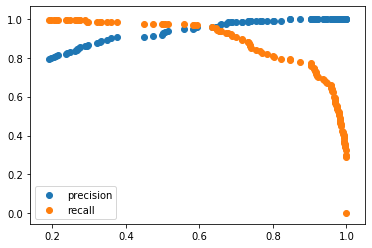

In [202]:
import matplotlib.pyplot as plt

plt.scatter(x = thresholds, y = precision[1:], label = 'precision')
plt.scatter(x = thresholds, y = recall[1:], label = 'recall')
plt.legend()

<img src="./even-rf-roc.png" width="50%">

We can see from the plot above that we can achieve a high level of recall, without a serious drop to precision.  Of course we don't want to just to classify everything as cancerous.  That wouldn't be so helpful.  

Let's experiment with a threshold of .05 to see how we perform.

In [215]:
from sklearn.metrics import precision_score, recall_score

threshold = .05

precision_with_threshold = precision_score(y_validate, even_rf.predict_proba(X_validate)[:, 1] > threshold)
precision_with_threshold
# 0.5675675675675675

0.5675675675675675

In [216]:
recall_with_threshold = recall_score(y_validate, even_rf.predict_proba(X_validate)[:, 1] > threshold)
recall_with_threshold

# 0.9761904761904762

1.0

We see that if we set a threshold at .12, we can capture all of the positive cases, and still maintain a precision score at .05.  Let's do that.

### Combining our Data

Let's combine our training and validation data, so we can retrain a randomforest.

In [131]:
X_combined = pd.concat([X_train, X_validate])
y_combined = pd.concat([y_train, y_validate]) 


RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_leaf=7, n_estimators=50, random_state=1)

And let's practice undersampling our data with this new dataset.  We'll combine our features and targets into one dataframe.

In [172]:
X_y_combined = X_combined.assign(y = y_combined)
X_y_combined[:2]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
164,2.596659,0.640025,2.476807,2.932585,-0.851870,0.192528,0.547405,1.240713,-0.038768,-1.030259,...,0.414075,2.291686,2.676276,-0.419448,0.661808,0.588232,1.827097,1.113428,0.439125,1
28,0.333066,1.391668,0.429654,0.220449,0.842579,1.238650,0.998129,0.995412,0.417600,0.368916,...,1.796619,1.252161,0.682803,1.390974,2.269333,1.733401,1.336800,1.822016,0.820940,1


Then separate out the observations with a positive target value, and negative target value accordingly.

In [217]:
X_y_positive = X_y_combined[X_y_combined['y'] == 1]
X_y_negative = X_y_combined[X_y_combined['y'] == 0]

In [218]:
X_y_positive.shape, X_y_negative.shape

((185, 31), (312, 31))

So we can see that to get them even, we should shuffle our negative data and select the first 185 samples.

> Set the random_state = 1.

In [219]:
shuffled_X_y_neg = X_y_negative.sample(frac = 1, random_state = 1)[:185]

Then combine this with the dataframe of positive values.

In [220]:
X_y_combined_even = pd.concat([X_y_positive, shuffled_X_y_neg])

And shuffle the data so that we do not have all of the positive data first.

> Set random_state = 1.

In [221]:
X_y_combined_even_shuffled = X_y_combined_even.sample(random_state = 1, frac = 1)

Now let's train a model randomforestclassifier with the same hyperparameters as previously, but without setting class_weight = 'balanced'.  

In [ ]:
rfc_combined = RandomForestClassifier(random_state = 1, n_estimators = 50,
                       min_samples_leaf = 7, max_features='log2')

Keep the same threshold of .05, and make predictions on the test data.

In [224]:
precision_test = precision_score(y_test, balanced_rf.predict_proba(X_test)[:, 1] > threshold)
precision_test

# 0.7049180327868853

0.7049180327868853

In [225]:
recall_test = recall_score(y_test, balanced_rf.predict_proba(X_test)[:, 1] > threshold)
recall_test

# 1.0

1.0

So we see that with the same threshold our precision decreases slightly on the test set, but we still capture all of the positive cases.

### Resources 
[Using Machine Learning Metrics](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)

[Smote](https://rikunert.com/SMOTE_explained)